In [6]:
# Importing pandas library
import pandas as pd

# Use the upload() function to upload files
from google.colab import files
uploaded = files.upload()

# Loop through the uploaded files
for file_name in uploaded.keys():
    # Load the CSV file into a DataFrame with specified encoding
    df = pd.read_csv(file_name, encoding='latin-1')
    # Display the first few rows of the DataFrame
    print(df.head())

Saving CS.csv to CS.csv
         Date   Open   High    Low  Close  Adj Close   Volume
0  2017-01-03  15.11  15.30  15.03  15.26  12.826453  7462400
1  2017-01-04  15.80  15.98  15.60  15.96  13.414824  7671900
2  2017-01-05  15.68  15.83  15.44  15.72  13.213097  5451100
3  2017-01-06  15.58  15.76  15.56  15.68  13.179476  4017000
4  2017-01-09  15.52  15.72  15.44  15.61  13.120638  2806300


In [9]:


# Sort DataFrame by date
df = df.sort_values(by='Date')
# Handle missing values (if any)
df = df.dropna()


# Sort DataFrame by date
df = df.sort_values(by='Date')

# Reset index
df = df.reset_index(drop=True)

# Write cleaned DataFrame back to a new CSV file
df.to_csv("cleaned_CS.csv", index=False)

print("Cleaning complete. Cleaned data saved to 'cleaned_CS.csv'")

# Write cleaned DataFrame back to a new CSV file
df.to_csv("cleaned_CS.csv", index=False)

print("Cleaning complete. Cleaned data saved to 'cleaned_CS.csv'")

Cleaning complete. Cleaned data saved to 'cleaned_CS.csv'
Cleaning complete. Cleaned data saved to 'cleaned_CS.csv'


Basic statistics of the stock prices:
              Open         High          Low        Close    Adj Close  \
count  1576.000000  1576.000000  1576.000000  1576.000000  1576.000000   
mean     11.465127    11.556041    11.365539    11.458293    10.751646   
std       3.932940     3.935829     3.924109     3.928854     3.439681   
min       0.820000     0.860000     0.820000     0.850000     0.850000   
25%       9.717500     9.797500     9.640000     9.740000     9.540773   
50%      11.760000    11.890000    11.710000    11.800000    11.078288   
75%      14.642500    14.720000    14.512500    14.602500    13.006490   
max      19.799999    19.980000    19.780001    19.980000    18.228960   

             Volume  
count  1.576000e+03  
mean   7.180016e+06  
std    1.826503e+07  
min    4.141000e+05  
25%    2.260050e+06  
50%    3.399850e+06  
75%    6.596300e+06  
max    4.341040e+08  


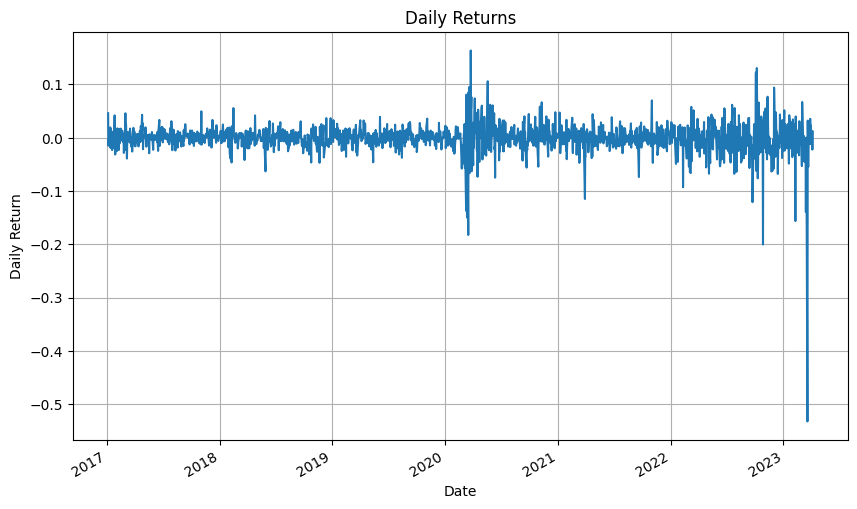

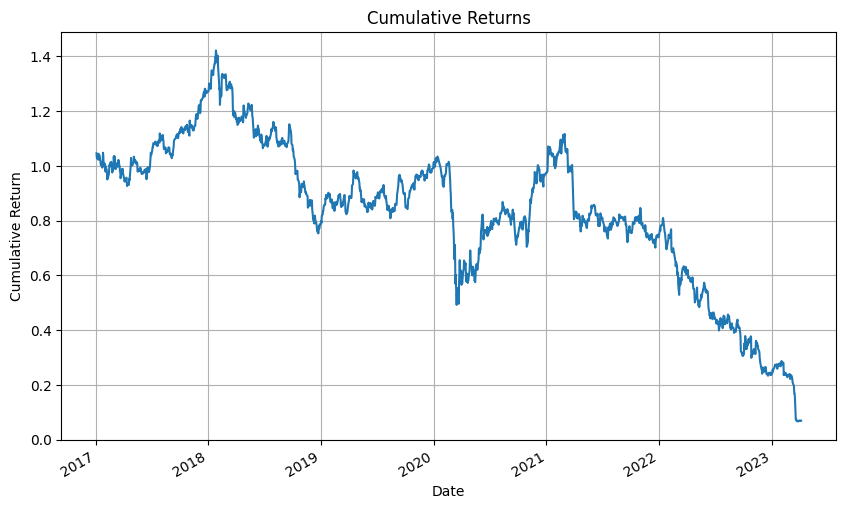

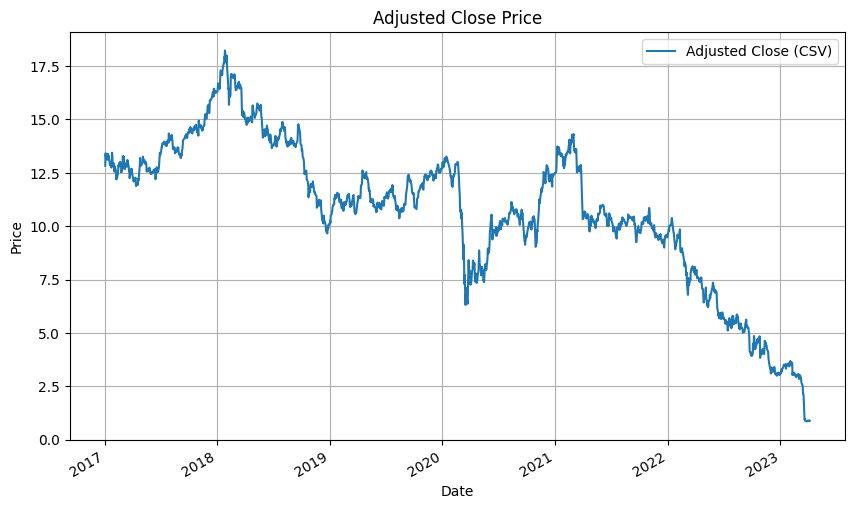

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv("CS.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Basic statistics
print("Basic statistics of the stock prices:")
print(df.describe())

# Calculate daily returns
df['Daily Return'] = df['Adj Close'].pct_change()

# Visualize daily returns
plt.figure(figsize=(10, 6))
df['Daily Return'].plot()
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

# Calculate cumulative returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

# Visualize cumulative returns
plt.figure(figsize=(10, 6))
df['Cumulative Return'].plot()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# Plot the stock's adjusted close price from CSV data
plt.figure(figsize=(10, 6))
df['Adj Close'].plot(label='Adjusted Close (CSV)')
plt.title('Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()




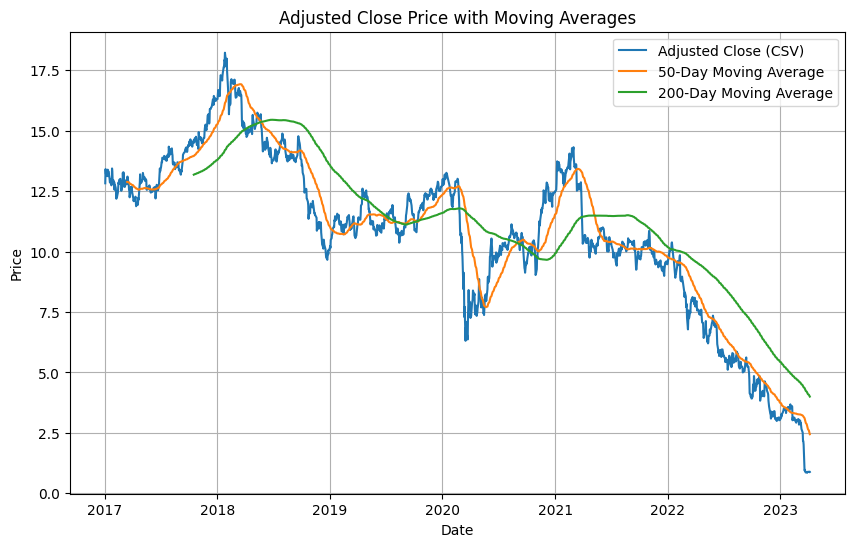

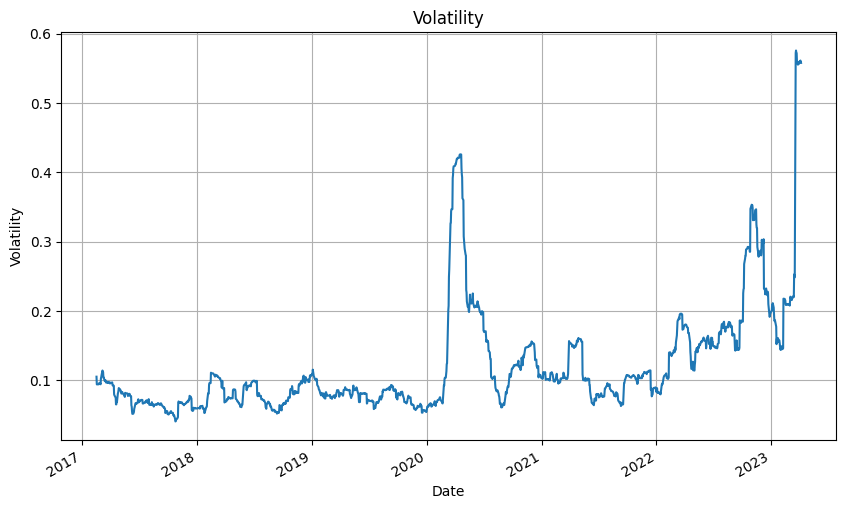

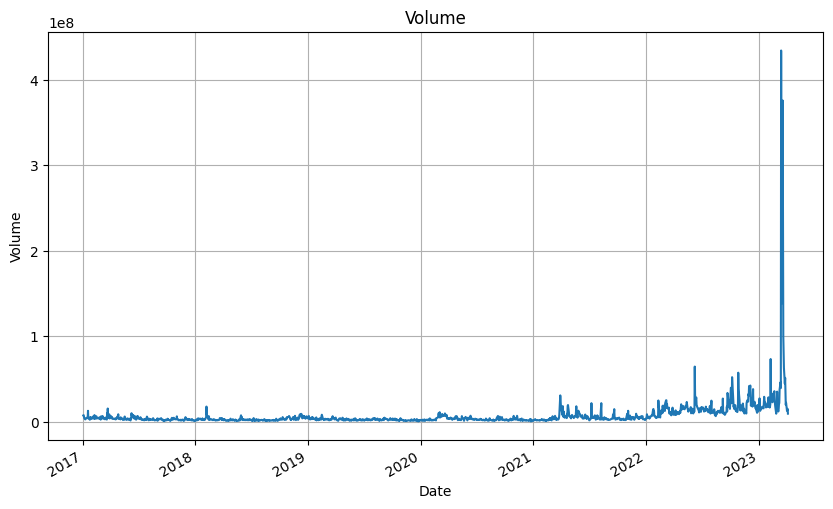

In [16]:
# Calculate 50-day and 200-day moving averages
df['MA50'] = df['Adj Close'].rolling(window=50).mean()
df['MA200'] = df['Adj Close'].rolling(window=200).mean()

# Plot moving averages along with adjusted close price
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Adjusted Close (CSV)')
plt.plot(df.index, df['MA50'], label='50-Day Moving Average')
plt.plot(df.index, df['MA200'], label='200-Day Moving Average')
plt.title('Adjusted Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate volatility (rolling standard deviation of daily returns)
volatility = df['Daily Return'].rolling(window=30).std() * np.sqrt(30)

# Plot volatility
plt.figure(figsize=(10, 6))
volatility.plot()
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

# Plot volume
plt.figure(figsize=(10, 6))
df['Volume'].plot()
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


In [17]:
# Calculate Sharpe Ratio
risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
excess_daily_returns = df['Daily Return'] - risk_free_rate / 252  # 252 trading days in a year
sharpe_ratio = excess_daily_returns.mean() / excess_daily_returns.std()

print("Sharpe Ratio:", sharpe_ratio)

# Calculate Maximum Drawdown
cumulative_returns = df['Cumulative Return']
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()

print("Maximum Drawdown:", max_drawdown)

# Correlation Analysis with S&P 500 Index (Assuming its ticker symbol is 'SPY')
import yfinance as yf

# Fetch S&P 500 data
spy_data = yf.download('SPY', start=df.index[0], end=df.index[-1])

# Calculate daily returns for S&P 500
spy_data['Daily Return'] = spy_data['Adj Close'].pct_change()

# Merge the two DataFrames on the date index
merged_df = pd.merge(df, spy_data[['Daily Return']], how='inner', left_index=True, right_index=True, suffixes=('_stock', '_spy'))

# Calculate correlation
correlation = merged_df['Daily Return_stock'].corr(merged_df['Daily Return_spy'])

print("Correlation with S&P 500:", correlation)


Sharpe Ratio: -0.046638751231036335
Maximum Drawdown: -0.9533708987179856


[*********************100%%**********************]  1 of 1 completed

Correlation with S&P 500: 0.5532210466874493


Beta: 1.2591213510756458
Expected Return (CAPM): 0.16091968321435063


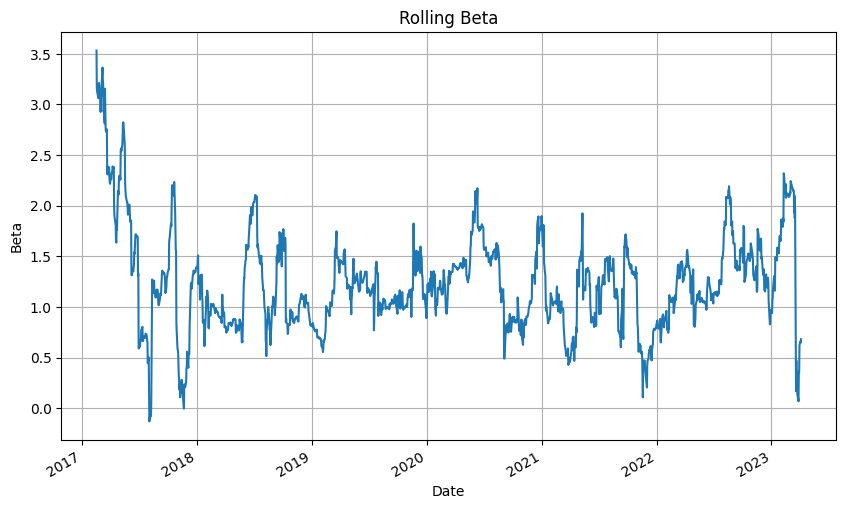

In [18]:
# Beta Calculation
covariance = merged_df['Daily Return_stock'].cov(merged_df['Daily Return_spy'])
market_variance = merged_df['Daily Return_spy'].var()
beta = covariance / market_variance

print("Beta:", beta)

# CAPM Calculation
risk_free_rate_annual = 0.02  # Assuming a risk-free rate of 2% annually
market_return_annual = merged_df['Daily Return_spy'].mean() * 252  # Annualizing market return
expected_return = risk_free_rate_annual + beta * (market_return_annual - risk_free_rate_annual)

print("Expected Return (CAPM):", expected_return)

# Rolling Beta Calculation
rolling_covariance = merged_df['Daily Return_stock'].rolling(window=30).cov(merged_df['Daily Return_spy'])
rolling_market_variance = merged_df['Daily Return_spy'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_market_variance

# Plot rolling beta
plt.figure(figsize=(10, 6))
rolling_beta.plot()
plt.title('Rolling Beta')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.show()


Value at Risk (VaR) at 95% confidence level: -0.03884696393740249


<ipython-input-21-1fc1879fcf40>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = price_series


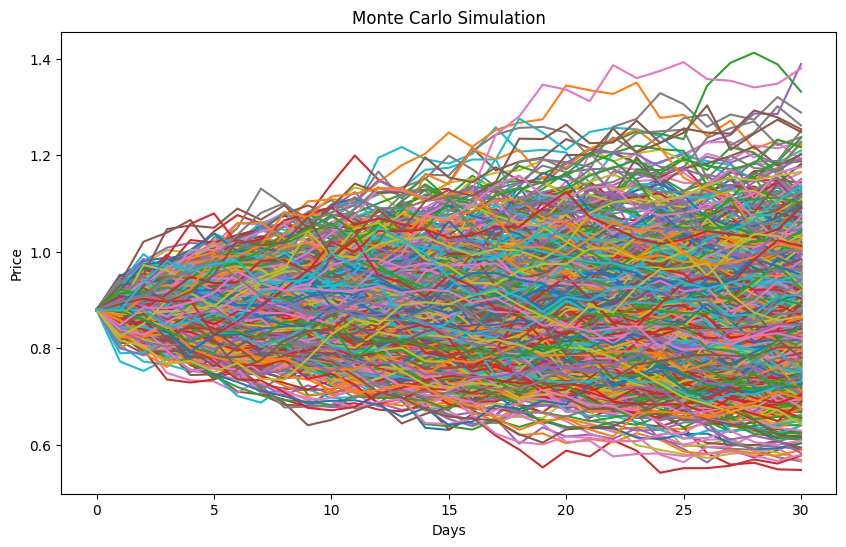

In [21]:
# VaR Calculation
confidence_level = 0.95
var = np.percentile(df['Daily Return'].dropna(), 100 * (1 - confidence_level))
print("Value at Risk (VaR) at 95% confidence level:", var)

# Monte Carlo Simulation
last_price = df['Adj Close'][-1]
num_simulations = 1000
num_days = 30
simulation_df = pd.DataFrame()

for x in range(num_simulations):
    daily_volatility = df['Daily Return'].std()
    daily_return = np.random.normal(0, daily_volatility, num_days) + 1
    price_series = [last_price]

    for y in daily_return:
        price_series.append(price_series[-1] * y)

    simulation_df[x] = price_series

plt.figure(figsize=(10, 6))
plt.title('Monte Carlo Simulation')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(simulation_df)
plt.show()



In [22]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 7.6 MB/s eta 0:00:00


In [23]:
from arch import arch_model

# Specify GARCH(1,1) model
model = arch_model(df['Daily Return'].dropna(), vol='Garch', p=1, q=1)

# Fit the model
model_fit = model.fit()

# Display model summary
print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3161429511.64614
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3241468594232.997
Iteration:      3,   Func. Count:     33,   Neg. LLF: -3824.008534212188
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3824.008537824624
            Iterations: 7
            Function evaluations: 33
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           Daily Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3824.01
Distribution:                  Normal   AIC:                          -7640.02
Method:            Maximum Likelihood   BIC:                          -7618.57
                                        No. Observations:                 1575
Date:                Fr

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007998. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


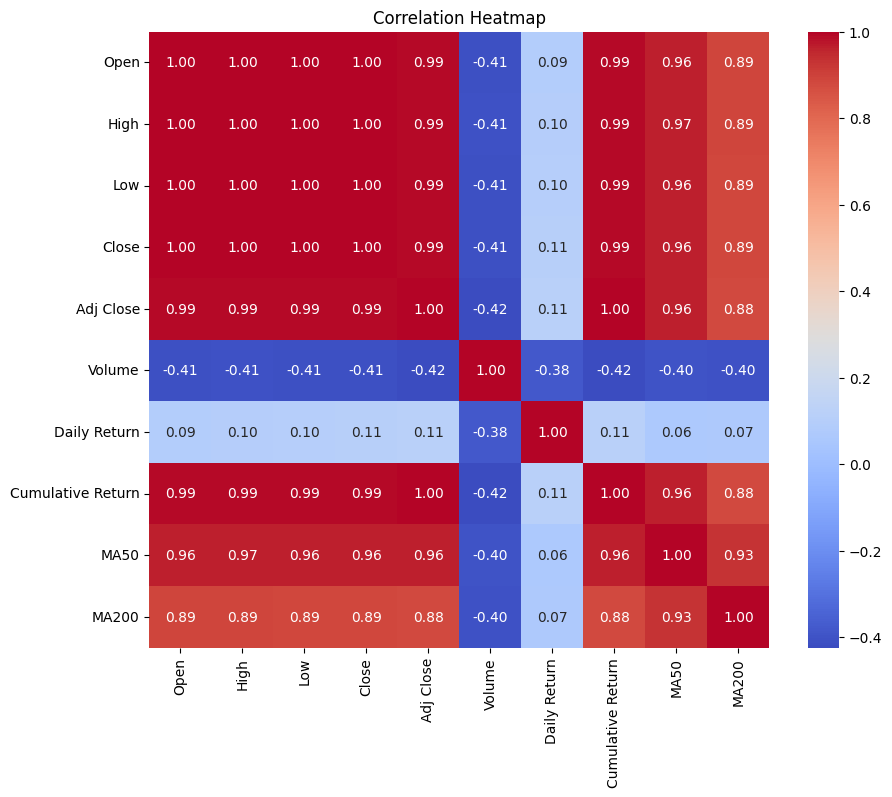

In [25]:
# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

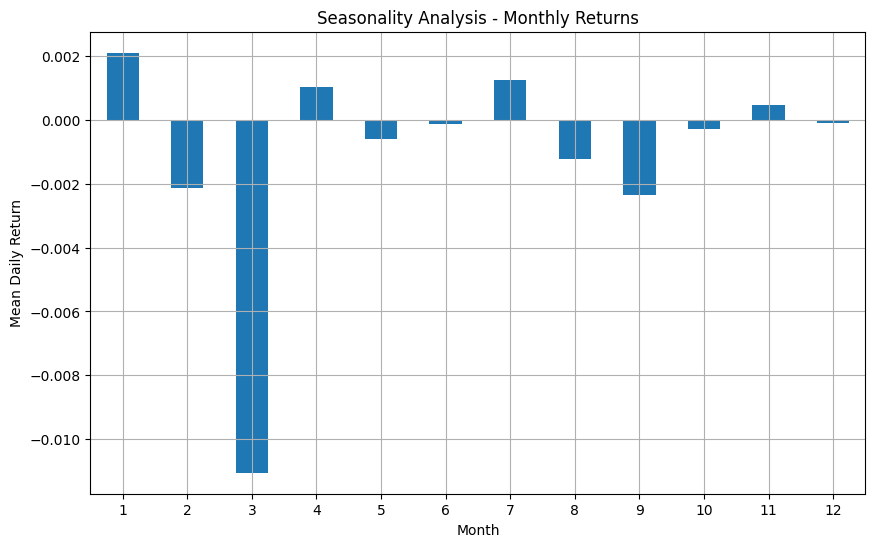

In [48]:
# Seasonality Analysis (example: monthly returns)
df['Month'] = df.index.month
monthly_returns = df.groupby('Month')['Daily Return'].mean()

plt.figure(figsize=(10, 6))
monthly_returns.plot(kind='bar')
plt.title('Seasonality Analysis - Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Mean Daily Return')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


In [34]:
from scipy.stats import genextreme

# Fit generalized extreme value distribution to the negative returns
neg_returns = df['Daily Return'][df['Daily Return'] < 0]
params = genextreme.fit(neg_returns)

# Calculate Value at Risk (VaR) using EVT
alpha = 0.05  # 95% confidence level
var_evt = genextreme.ppf(alpha, *params)

print("Value at Risk (VaR) using Extreme Value Theory (EVT):", var_evt)


Value at Risk (VaR) using Extreme Value Theory (EVT): -0.0553237560633537


<Figure size 1200x600 with 0 Axes>

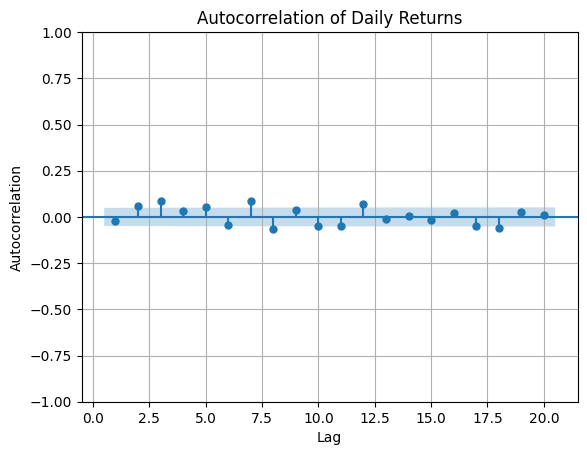

<Figure size 1200x600 with 0 Axes>

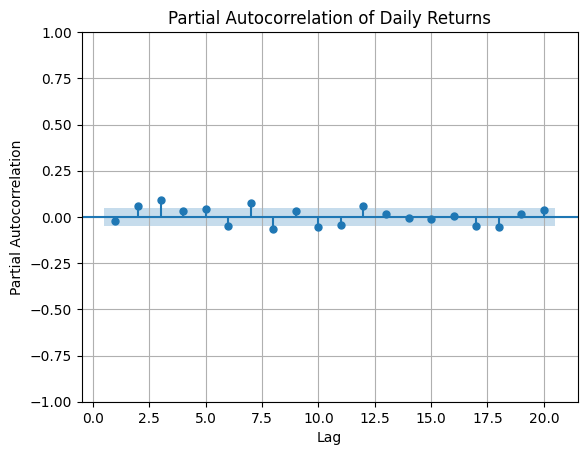

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Daily Return'].dropna(), lags=20, zero=False)
plt.title('Autocorrelation of Daily Returns')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Daily Return'].dropna(), lags=20, zero=False)
plt.title('Partial Autocorrelation of Daily Returns')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()